## Running Window Diffusion Coefficient

# Nocodazole Treatment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk

In [2]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
    return pd.concat(dfs)

In [4]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, 'No drug_2x')
df_condition2 = load_and_label_files(csv_files_2, 'Nocodazole_30 mins')
df_condition3 = load_and_label_files(csv_files_3, 'Nocodazole_60 mins')

In [5]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

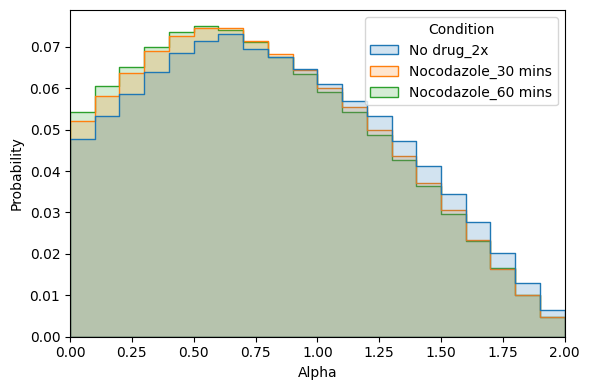

In [12]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=df_combined,
    x='alpha',
    hue='Condition',
    bins=20,
    binrange = (0,2),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)

plt.xlabel('Alpha')
plt.ylabel('Probability')
plt.xlim(0, 2) 
plt.tight_layout()
plt.show()